In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('../data/2. Восстановленные')
dates = pd.to_datetime(df.columns,format='%d.%m.%Y')

Алгоритм модификации


In [3]:
time_series = df.values[0]

In [4]:
# def find_indices_equal_to_mean(time_series, m):
#     indices = []
#     for index, value in enumerate(time_series):
#         if value == m:
#             indices.append(index)
#     return indices

In [5]:
def plot_time_series(time_series, mode=None):
    mean = np.mean(time_series)
    std_dev = np.std(time_series)

    lower_bound_2sigma = mean - 2 * std_dev
    upper_bound_2sigma = mean + 2 * std_dev
    lower_bound_1sigma = mean - 0.5*std_dev
    upper_bound_1sigma = mean + 0.5*std_dev

    modified_time_series = np.copy(time_series)

    modified_time_series[(modified_time_series >= lower_bound_1sigma) & (modified_time_series <= upper_bound_1sigma)] = mean
    #cut_modified_time_series = modified_time_series[ modified_time_series != mean]
    if mode == 'draw':
        plt.figure(figsize=(25, 3))

        # График до изменения
        plt.subplot(1, 3, 1)
        plt.grid(linestyle='dotted')
        plt.plot(time_series, color='black', alpha=0.7)
        plt.axhline(y=lower_bound_2sigma, color='red', linestyle='--', label='-2$\sigma$')
        plt.axhline(y=upper_bound_2sigma, color='red', linestyle='--', label='+2$\sigma$')
        plt.axhline(y=lower_bound_1sigma, color='blue', linestyle='--', label='-1$\sigma$')
        plt.axhline(y=upper_bound_1sigma, color='blue', linestyle='--', label='+1$\sigma$')
    #         Добавляем заливку между синими линиями
    #     Добавляем заливку между синими линиями
        plt.fill_between(x=range(len(time_series)), y1=lower_bound_1sigma, y2=upper_bound_1sigma, color='blue', alpha=0.1)

        plt.legend()
        plt.xlabel('Индекс')
        plt.ylabel('Значение')
        plt.title('Временной ряд до изменения')

        # График после изменения
        plt.subplot(1, 3, 2)
        plt.grid(linestyle='dotted')
        plt.plot(modified_time_series, color='black', alpha=0.7)
        plt.axhline(y=lower_bound_2sigma, color='red', linestyle='--', label='-2$\sigma$')
        plt.axhline(y=upper_bound_2sigma, color='red', linestyle='--', label='+2$\sigma$')
        plt.axhline(y=lower_bound_1sigma, color='blue', linestyle='--', label='-1$\sigma$')
        plt.axhline(y=upper_bound_1sigma, color='blue', linestyle='--', label='+1$\sigma$')
        plt.legend()
        plt.xlabel('Индекс')
        plt.ylabel('Значение')
        plt.title('Временной ряд после изменения')

    #     plt.subplot(1, 3, 3)
    #     plt.grid(linestyle='dotted')
    #     plt.plot(cut_modified_time_series, color='black', alpha=0.7)
    #     plt.axhline(y=lower_bound_2sigma, color='red', linestyle='--', label='-2$\sigma$')
    #     plt.axhline(y=upper_bound_2sigma, color='red', linestyle='--', label='+2$\sigma$')
    #     plt.axhline(y=lower_bound_1sigma, color='blue', linestyle='--', label='-1$\sigma$')
    #     plt.axhline(y=upper_bound_1sigma, color='blue', linestyle='--', label='+1$\sigma$')
    #     plt.legend()
    #     plt.xlabel('Индекс')
    #     plt.ylabel('Значение')
    #     plt.title('Временной ряд после изменения')


        plt.tight_layout()
        plt.show()
    indices = []
    for index, value in enumerate(modified_time_series):
        if value == mean:
            indices.append(index)
    
    
    return modified_time_series, np.array(indices)



In [6]:
time_series = df.values[0]
mod_ts_1, indices = plot_time_series(time_series)

In [7]:
time_series = df.values[2]
mod_ts_2, indices = plot_time_series(time_series)

In [8]:
time_series = df.values[3]
mod_ts_3, indices = plot_time_series(time_series)
mod_ts_1 +=0.5
mod_ts_3 +=0.75

In [9]:
# plt.figure(figsize=(12,4))
# plt.plot(dates,mod_ts_1,color='blue',linewidth=1,alpha=1)
# plt.plot(dates,mod_ts_2,color='blue',linewidth=1,alpha=1)
# plt.plot(dates,mod_ts_3,color='blue',linewidth=1,alpha=1)
# for i in indexes_for_cut:
#     plt.scatter(dates[i],mod_ts_1[i],color='red',s=3)
#     plt.scatter(dates[i],mod_ts_2[i],color='red',s=3)
#     plt.scatter(dates[i],mod_ts_3[i],color='red',s=3)
#     plt.plot([dates[i],dates[i]],[mod_ts_3[i],mod_ts_2[i]],color='red',linestyle='--',linewidth=1,alpha=0.5)
# #plt.legend(loc='best')

# plt.show()

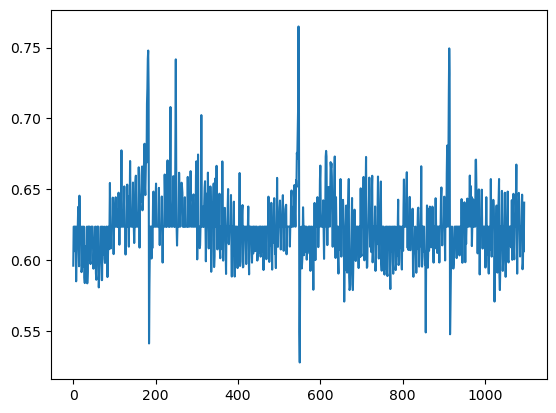

In [10]:
plt.plot(mod_ts_1)
plt.show()

получим индексы значений которые потенциально могут быть обрезаны

In [11]:
arr_indexes_mean = []
for index, row in df.iterrows():
        modified_row,indices = plot_time_series(row)
        arr_indexes_mean.append(indices)
        df.loc[index] = modified_row

In [12]:
arr_indexes_mean[0][:10]

array([ 1,  2,  4,  5,  6,  9, 11, 17, 18, 19])

Подсчитаем индексы там где они могут изменяться

In [13]:
def count_elements_in_list_of_arrays(arrays):
    flattened_list = [item for sublist in arrays for item in sublist]
    counter = Counter(flattened_list)
    return counter

arrays = arr_indexes_mean
counter = count_elements_in_list_of_arrays(arrays)

In [14]:
sum_counter = sum(counter.values())

In [15]:
counter_df = pd.DataFrame(sorted([[k,v/sum_counter] for k,v in counter.items()],key=lambda x: x[0]),columns=['индекс', 'значение'])
counter_df['date'] = dates

In [16]:
counter_df['значение'].sum()
counter_df['%'] = counter_df['значение']*100
counter_df['количество'] = counter_df['значение'] * sum_counter

In [17]:
counter_df = counter_df.sort_values(by='значение', ascending=False)

In [18]:
counter_df['аккамуляция %'] = counter_df['%'].cumsum()

In [19]:
counter_df

,индекс,значение,date,%,количество,аккамуляция %
496,496,0.001613,2019-11-09,0.161300,966.0,0.161300
489,489,0.001611,2019-11-02,0.161133,965.0,0.322433
453,453,0.001580,2019-09-27,0.157960,946.0,0.480394
475,475,0.001571,2019-10-19,0.157126,941.0,0.637519
503,503,0.001558,2019-11-16,0.155790,933.0,0.793309
...,...,...,...,...,...,...
915,915,0.000027,2021-01-01,0.002672,16.0,99.993822
184,184,0.000027,2019-01-01,0.002672,16.0,99.996493
548,548,0.000015,2019-12-31,0.001503,9.0,99.997996
914,914,0.000012,2020-12-31,0.001169,7.0,99.999165


In [43]:
per1 = counter_df[counter_df['количество']>750]['количество'].sum()/sum_counter
per2 = counter_df[counter_df['количество']>600]['количество'].sum()/sum_counter


per1,per2

(0.1202904068233581, 0.48783403797730446)

Text(0.5, 1.0, 'Столбчатая гистограмма количества усреднений в зависимости от даты при $m=0.5 $')

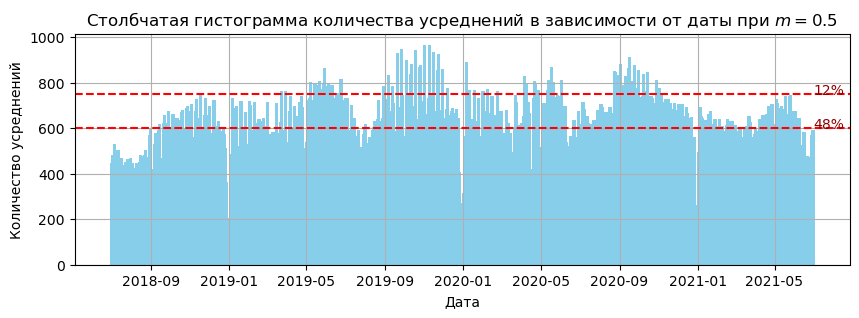

In [44]:
plt.figure(figsize=(10, 3))
plt.bar(dates[counter_df['индекс'].values], counter_df['количество'], color='skyblue',width=5)
plt.axhline(y=750, color='red', linestyle='--')
plt.text(dates[-1], 750, '12%',color='darkred')
plt.text(dates[-1], 600, '48%',color='darkred')
plt.axhline(y=600, color='red', linestyle='--')

plt.hlines
plt.xlabel('Дата')
plt.ylabel('Количество усреднений')
plt.grid()
plt.title(r'Столбчатая гистограмма количества усреднений в зависимости от даты при $m=0.5 $')

## Дальше мы работаем в интервале накопительное значение от нуля до 50%

In [45]:
indexes_for_cut = counter_df.loc[counter_df['аккамуляция %']<30]['индекс'].values
selected_columns = df.drop(df.columns[indexes_for_cut], axis=1)
selected_columns

,01.07.2018,02.07.2018,03.07.2018,04.07.2018,05.07.2018,06.07.2018,07.07.2018,08.07.2018,09.07.2018,10.07.2018,...,21.06.2021,22.06.2021,23.06.2021,24.06.2021,25.06.2021,26.06.2021,27.06.2021,28.06.2021,29.06.2021,30.06.2021
0,0.096014,0.123574,0.123574,0.106293,0.123574,0.123574,0.123574,0.084991,0.107838,0.123574,...,0.123574,0.123574,0.123574,0.123574,0.146163,0.093505,0.097756,0.123574,0.105955,0.140505
1,0.118326,0.088699,0.103605,0.103605,0.103605,0.119571,0.127959,0.125418,0.085744,0.103605,...,0.135949,0.142657,0.137667,0.150512,0.180561,0.151897,0.141661,0.147173,0.136710,0.149855
2,0.185355,0.152900,0.165780,0.158368,0.185355,0.216427,0.185355,0.145459,0.185355,0.164228,...,0.225440,0.230984,0.245519,0.238987,0.309632,0.230621,0.185355,0.240536,0.245876,0.228196
3,0.083641,0.083641,0.071102,0.067280,0.083641,0.106197,0.106011,0.083641,0.083641,0.083641,...,0.122722,0.127414,0.117086,0.131116,0.174359,0.152423,0.099189,0.117667,0.107124,0.116275
4,0.157671,0.157671,0.157671,0.142312,0.143815,0.171965,0.182841,0.157671,0.157671,0.157671,...,0.157671,0.157671,0.136271,0.157671,0.157671,0.127667,0.130184,0.139576,0.145267,0.147726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,0.121699,0.124563,0.104735,0.117933,0.138529,0.111687,0.116963,0.121889,0.113962,0.124883,...,0.189897,0.178127,0.172864,0.187341,0.138529,0.162931,0.156532,0.167025,0.176310,0.171776
1384,0.069113,0.097854,0.074643,0.078780,0.076101,0.080905,0.083648,0.070530,0.080512,0.077906,...,0.125759,0.132996,0.118723,0.119927,0.097854,0.115828,0.122782,0.115166,0.116495,0.116708
1385,0.017318,0.014911,0.017318,0.021210,0.021618,0.017318,0.014919,0.019982,0.017318,0.014020,...,0.017318,0.017318,0.017318,0.017318,0.008013,0.022304,0.014904,0.017318,0.017318,0.023160
1386,0.098087,0.097050,0.072853,0.096078,0.098812,0.087046,0.088072,0.084153,0.090289,0.088275,...,0.172401,0.170067,0.175357,0.193496,0.151167,0.151167,0.151167,0.151167,0.151167,0.151167


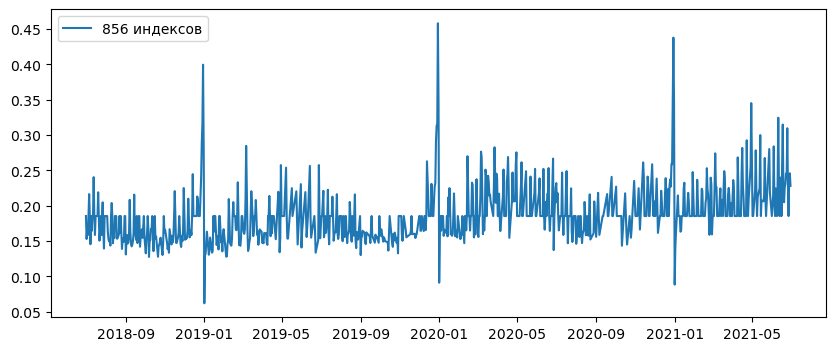

In [46]:
plt.figure(figsize=(10,4))
plt.title('')
plt.plot([d for i,d in enumerate(dates) if i not in indexes_for_cut], selected_columns.values[2],label=f'{len(selected_columns.values[2])} индексов')
plt.legend(loc='best')
plt.show()

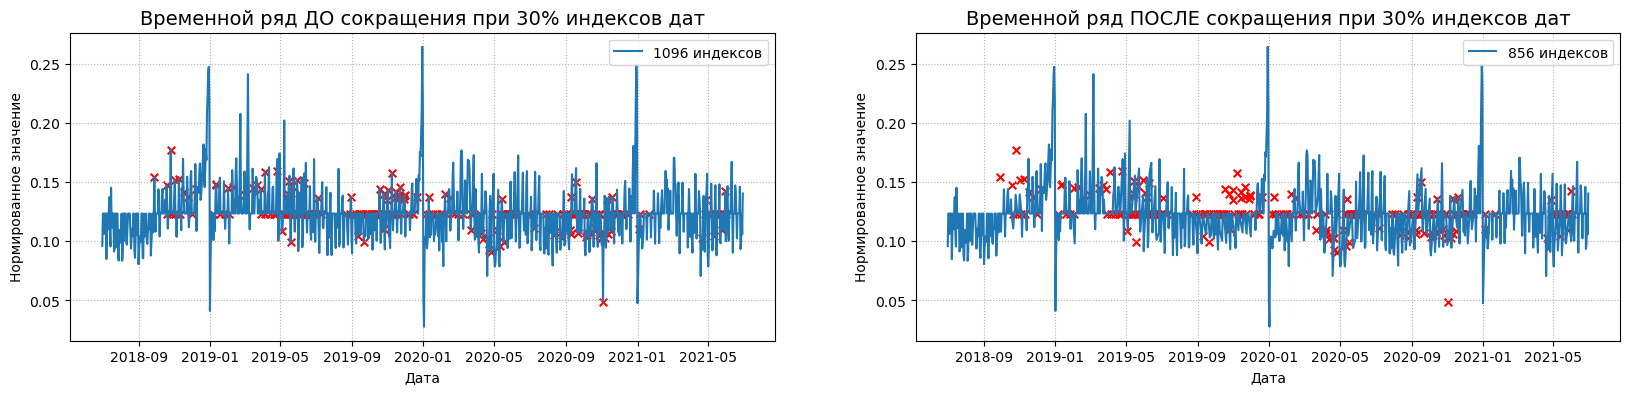

In [47]:
for i in range(1):
    plt.figure(figsize=(20,4))
    plt.subplot(1, 2, 1)
    plt.title(f'Временной ряд ДО сокращения при {30}% индексов дат', fontsize=14)
    plt.plot(dates, df.values[i],label=f'{len(df.values[i])} индексов')
    plt.xlabel('Дата')
    plt.ylabel('Нормированное значение')

    plt.grid(linestyle='dotted')

    
    plt.scatter(dates[indexes_for_cut], df[df.columns[indexes_for_cut]].values[i],color ='red',marker='x',s=30)
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    plt.title(f'Временной ряд ПОСЛЕ сокращения при {30}% индексов дат', fontsize=14)
    plt.xlabel('Дата')
    plt.ylabel('Нормированное значение')
    
    plt.grid(linestyle='dotted')
    plt.plot([d for i,d in enumerate(dates) if i not in indexes_for_cut], selected_columns.values[i],label=f'{len(selected_columns.values[i])} индексов')
    
    plt.scatter(dates[indexes_for_cut], df[df.columns[indexes_for_cut]].values[i],color ='red',marker='x',s=30)
    plt.legend(loc='best')
    
    plt.show()

In [169]:
dates[~indexes_for_cut]

DatetimeIndex(['2020-02-27', '2020-04-03', '2020-03-12', '2020-04-10',
               '2020-03-19', '2020-02-13', '2020-02-06', '2020-02-20',
               '2019-04-13', '2019-03-30',
               ...
               '2019-05-28', '2020-06-20', '2018-09-17', '2018-11-10',
               '2020-09-17', '2019-01-24', '2019-07-02', '2018-12-04',
               '2020-05-11', '2018-11-13'],
              dtype='datetime64[ns]', length=271, freq=None)

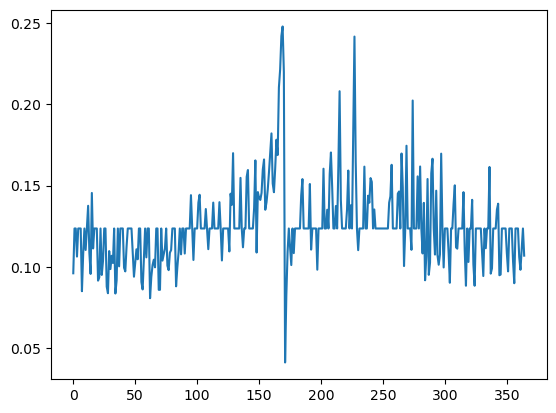

In [53]:
selected_columns[selected_columns.columns[:365]]

In [54]:
selected_columns[selected_columns.columns[:365]].to_csv('../data/3. Модификации.csv', index = False)